##### Problem 5.1

Show that the logistic sigmoid function sig[z] becomes 0 as z → −∞, is 0.5
when z = 0, and becomes 1 when z → ∞, where:

$sig[z] = \frac{1}{1 + \exp[-z]}$

$
\begin{aligned}
sig[z] &= \frac{1}{1 + \exp[-z]} = \frac{1}{1 + \frac{1}{\exp[z]}} \\
\lim_{z \to \space \infty}sig[z] &= \frac{1}{1} = 1 \\
\lim_{z \to -\infty}sig[z] &= 0 \\
sig[0] &= \frac{1}{1 + \frac{1}{\exp[0]}} = \frac{1}{2} = 0.5
\end{aligned}
$

##### Problem 5.2

The loss L for binary classification for a single training pair {x, y} is:

$
L = -(1-y) \log(1 - sig[f[x, \phi]]) - y \log(sig[f[x, \phi]])
$

where sig[•] is defined in equation 5.32. Plot this loss as a function of the transformed network  
output sig[f[x,ϕ]] ∈ [0, 1] (i) when the training label y = 0 and (ii) when y = 1.

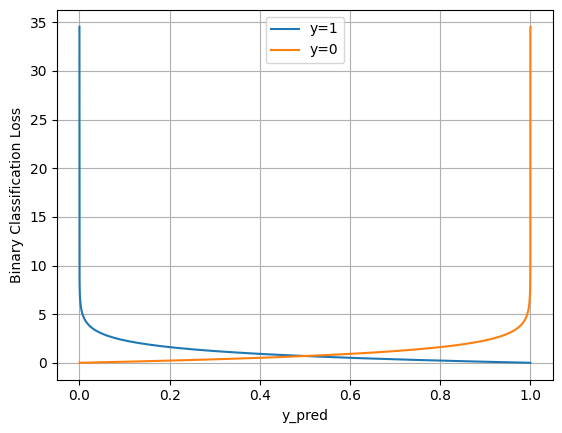

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# for f(x) will use the identity function -> sig[f[x]] = sig[x]

def sigmoid(x: np.array) -> np.array:
    return 1/(1+np.exp(-x))

x = np.linspace(-100, 100, 1000)
y_pred = sigmoid(x)
pos_class = np.ones(1000)
neg_class = np.zeros(1000)

def binary_classification_loss(y: np.array, y_pred: np.array) -> np.array:
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -(1-y)*np.log(1-y_pred) - y*np.log(y_pred)

plt.plot(y_pred, binary_classification_loss(pos_class, y_pred), label='y=1')
plt.plot(y_pred, binary_classification_loss(neg_class, y_pred), label='y=0')
plt.legend()
plt.xlabel('y_pred')
plt.ylabel('Binary Classification Loss')
plt.grid(True)
plt.show()

As you can see if the true value is 1 or vice versa and I make the opposite prediction,  
that this then leads to a massive loss, which grows exponentially.

##### Problem 5.3

Suppose we want to build a model that predicts the direction y in radians of the  
prevailing wind based on local measurements of barometric pressure x. A suitable distribution  
over circular domains is the von Mises distribution (figure 5.13):

$
Pr(y|\mu, \kappa) = \frac{\exp\left[ \kappa \cos(y - \mu) \right]}{2\pi \cdot \text{Bessel}_0[\kappa]}
$

<div style="max-width:500px;">

![fig-5.13.png](assets/fig-5.13.png)
</div>

where μ is a measure of the mean direction and κ is a measure of concentration (i.e., the inverse  
of the variance). The term Bessel0[κ] is a modified Bessel function of the first kind of order 0.  
Use the recipe from section 5.2 to develop a loss function for learning the parameter μ of a  
model f[x,ϕ] to predict the most likely wind direction. Your solution should treat the concentration  
κ as constant. How would you perform inference?

$$
\begin{aligned}
\hat{\phi} &= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\log\left[Pr(y_i|f[x_i,\phi])\right]\right] \\
&= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\log\left[\frac{\exp\left[ \kappa \cos(y_i - f[x_i,\phi]) \right]}{2\pi \cdot \text{Bessel}_0[\kappa]}\right]\right] \\
&= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\log\left[\exp\left[ \kappa \cos(y_i - f[x_i,\phi]) \right]\right] - \log\left[2\pi \cdot \text{Bessel}_0[\kappa]\right]\right] \\
&= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I \kappa \cos(y_i - f[x_i,\phi]) \right] \\
&= \underset{\phi}{\text{argmin}}\left[-\kappa \sum_{i=1}^I \cos(y_i - f[x_i,\phi]) \right] \\
&= \underset{\phi}{\text{argmin}}\left[- \sum_{i=1}^I \cos(y_i - f[x_i,\phi]) \right] \\ 
&\Rightarrow L =  - \sum_{i=1}^I \cos(y_i - f[x_i,\phi]) \\ \\

\end{aligned}
$$

$$
\begin{align*}
&\text{You can easily do inference since you know that the direction with the highest probability is } \hat{y} = f[x_i, \phi] = \mu. \\
&\text{However, it's important to understand that } \mu \not \in [-\pi, \pi] \text{ directly, as angles are periodic in radians.} \\
&\text{For instance, } 3\pi \text{ is equivalent to } \pi \text{ on the unit circle.} \\ 
&\text{To ensure } \mu \text{ is within the desired range, you can calculate:} \\
&\hspace{3cm} \hat{y}_{\text{normalized}} = \hat{y} - 2\pi \cdot \text{round}\left(\frac{\hat{y}}{2\pi}\right)
\end{align*}
$$



##### Problem 5.4

Sometimes, the predictions y for a given input x are naturally multimodal as  
in figure 5.14a from book; there is more than one valid prediction for a given input. In this  
case, we might use a weighted sum of normal distributions as the distribution over the output.  
This is known as a mixture of Gaussians model . For example, a mixture of two Gaussians has  
distribution parameters $θ = \{λ, μ^1, σ^2_1, μ^2, σ^2_2\}$ is defined by:

<div style="max-width:500px;">

![fig-5.14.png](assets/fig-5.14.png)
</div>

$
    Pr(y \mid \lambda, \mu_1, \mu_2, \sigma_1^2, \sigma_2^2) =  \frac{\lambda}{\sqrt{2\pi \sigma_1^2}} \exp \left[ -\frac{(y - \mu_1)^2}{2\sigma_1^2} \right] 
     + \frac{1 - \lambda}{\sqrt{2\pi \sigma_2^2}} \exp \left[ -\frac{(y - \mu_2)^2}{2\sigma_2^2} \right],
$

where $λ ∈ [0, 1]$ controls the relative weight of the two components, which have means $μ1, μ2$   
and variances $σ^2_1, σ^2_2$, respectively. This model can represent a distribution with two peaks  
(figure 5.14b) or a distribution with one peak but a more complex shape (figure 5.14c).  
Use the recipe from section 5.2 to construct a loss function for training a model $f[x,ϕ]$ that takes  
input x, has parameters $ϕ$, and predicts a mixture of two Gaussians. The loss should be based  
on I training data pairs ${x_i, y_i}$. What problems do you foresee when performing inference?  

$$
\begin{aligned}
\hat{\phi} &= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\log\left[\frac{\lambda}{\sqrt{2\pi \sigma_1^2}} \exp \left[ -\frac{(y_i - \mu_1)^2}{2\sigma_1^2} \right] 
     + \frac{1 - \lambda}{\sqrt{2\pi \sigma_2^2}} \exp \left[ -\frac{(y_i - \mu_2)^2}{2\sigma_2^2} \right]\right]\right] \\
     &= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\log\left[\frac{sig[f_1[x_i, \phi]]}{\sqrt{2\pi f_3[x_i, \phi]^2}} \exp \left[ -\frac{(y_i - f_2[x_i, \phi])^2}{2f_3[x_i, \phi]^2} \right] 
     + \frac{1 - sig[f_1[x_i, \phi]]}{\sqrt{2\pi f_5[x_i, \phi]^2}} \exp \left[ -\frac{(y_i - f_4[x_i, \phi])^2}{2f_5[x_i, \phi]^2} \right]\right]\right] \\
     &\Rightarrow L = -\sum_{i=1}^I\log\left[\frac{sig[f_1[x_i, \phi]]}{\sqrt{2\pi f_3[x_i, \phi]^2}} \exp \left[ -\frac{(y_i - f_2[x_i, \phi])^2}{2f_3[x_i, \phi]^2} \right] 
     + \frac{1 - sig[f_1[x_i, \phi]]}{\sqrt{2\pi f_5[x_i, \phi]^2}} \exp \left[ -\frac{(y_i - f_4[x_i, \phi])^2}{2f_5[x_i, \phi]^2} \right]\right]
\end{aligned}
$$

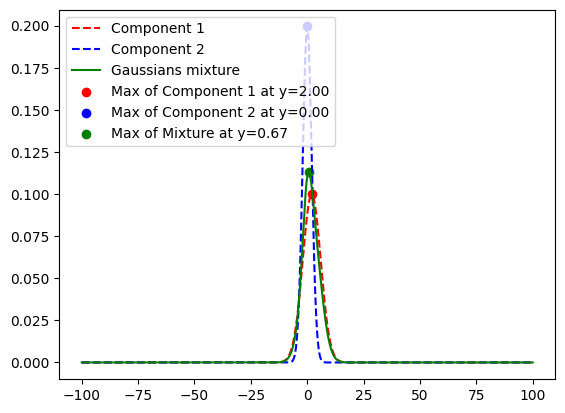

In [42]:
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

def plot_gaussian_mixture(mu_1, sigma_1, mu_2, sigma_2):
    y = np.linspace(-20, 10, 1000)

    pdf_1 = norm.pdf(x, mu_1, sigma_1)
    pdf_2 = norm.pdf(x, mu_2, sigma_2)
    pdf_res = fact * pdf_1 + (1 - fact) * pdf_2

    def neg_pdf_1(x):
        return -norm.pdf(x, mu_1, sigma_1)

    def neg_pdf_2(x):
        return -norm.pdf(x, mu_2, sigma_2)

    def neg_pdf_res(x):
        return -(fact * norm.pdf(x, mu_1, sigma_1) + (1 - fact) * norm.pdf(x, mu_2, sigma_2))

    max_1 = minimize(neg_pdf_1, mu_1).x[0]
    max_2 = minimize(neg_pdf_2, mu_2).x[0]
    max_res = minimize(neg_pdf_res, (mu_1 + mu_2) / 2).x[0]


    plt.plot(x, pdf_1, linestyle="--", label='Component 1', color='red')
    plt.plot(x, pdf_2, linestyle="--", label='Component 2', color='blue')
    plt.plot(x, pdf_res, label='Gaussians mixture', color="green")

    plt.scatter(max_1, norm.pdf(max_1, mu_1, sigma_1), color='red', label=f'Max of Component 1 at y={max_1:.2f}')
    plt.scatter(max_2, norm.pdf(max_2, mu_2, sigma_2), color='blue', label=f'Max of Component 2 at y={max_2:.2f}')
    plt.scatter(max_res, fact * norm.pdf(max_res, mu_1, sigma_1) + (1 - fact) * norm.pdf(max_res, mu_2, sigma_2), color='green', label=f'Max of Mixture at y={max_res:.2f}')

    plt.legend(loc='upper left')
    plt.show()



mu_1 = 2
sigma_1 = 4

mu_2 = 0
sigma_2 = 2

fact = 0.8

plot_gaussian_mixture(mu_1, sigma_1, mu_2, sigma_2)



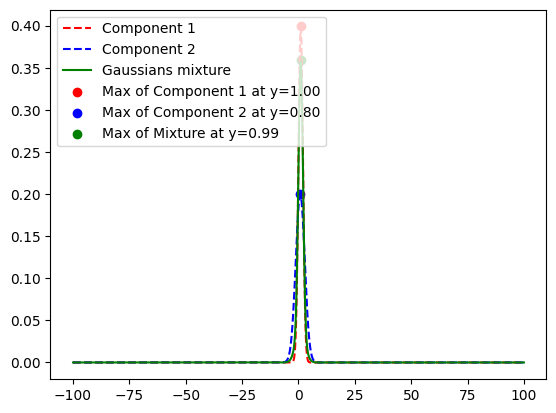

In [43]:
mu_1 = 1
sigma_1 = 1

mu_2 = 0.8
sigma_2 = 2

fact = 0.8

plot_gaussian_mixture(mu_1, sigma_1, mu_2, sigma_2)

Here you can see that even if the $\mu$ values are very close that the position at which y can be maximized is not one of the available $\mu's$.
You can see clearly for a normal distribution that the position at which the highest probability $\mu$ is.

See (5.10)  

$\begin{aligned}
&\min\left[\sum_{i=1}^I(y_i - \mu)^2\right] \\
&= 2 \cdot \sum_{i=1}^I(y_i - \mu)^2 = 0
\end{aligned}
$

Here you can see directly that for $\mu = y_i$ the probability can be maximized, if $f[x_i, \phi] = \mu = y_i$

Unfortunately the same does not apply for the mixture of gaussian model, since there is no close form that describes that parameter.  What you could do is  
do a gradient descent by starting at each $\mu$ value and then check out what the position of the highest probability is.  

##### Problem 5.5

Consider extending the model from problem 5.3 to predict the wind direction using  
a mixture of two von Mises distributions. Write an expression for the likelihood $Pr(y|θ)$ for  
this model. How many outputs will the network need to produce?

$\theta = \{\lambda, \mu_1, \mu_2\}$

$\hat{\phi} = \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\log\left[f_1[x_i, \phi] \cdot \frac{\exp\left[ \kappa \cos(y_i - f_2[x_i,\phi]) \right]}{2\pi \cdot \text{Bessel}_0[\kappa]} + (1 - f_1[x_i, \phi]) \cdot \frac{\exp\left[ \kappa \cos(y_i - f_3[x_i,\phi]) \right]}{2\pi \cdot \text{Bessel}_0[\kappa]}\right]\right]
$

The model will need to produce three new outputs and $\kappa$ is a constant and therefore can be ignored.

##### Problem 5.6

Consider building a model to predict the number of pedestrians y ∈ {0, 1, 2, . . .}  
that will pass a given point in the city in the next minute, based on data x that contains  
information about the time of day, the longitude and latitude, and the type of neighborhood.  
A suitable distribution for modeling counts is the Poisson distribution (figure 5.15). This has  
a single parameter λ > 0 called the rate that represents the mean of the distribution. The  
distribution has probability density function:

<div style="max-width:550px;">

![fig-5.15.png](assets/fig-5.15.png)

</div>

$
Pr(y = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$

Design a loss function for this model assuming we have access to I training pairs $\{x_i, y_i\}$.

For every $x_i$ there shall be a Poisson distribution, with $\lambda = f[x_i, \phi]$.

$$
\begin{aligned}
\hat{\phi} &= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\log \left[ \frac{f[x_i, \phi]^{y_i} e^{-f[x_i, \phi]}}{y_i!}\right] \right] \\
&= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\log \left[f[x_i, \phi]^{y_i} \cdot e^{f[x_i, \phi]}\right] - \log\left[y_i!\right]\right] \\
&= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I y_i \cdot \log \left [f[x_i, \phi]\right] + f[x_i, \phi] - \log\left[y_i!\right]\right] \\
&\Rightarrow L = -\sum_{i=1}^I y_i \cdot \log \left [f[x_i, \phi]\right] + f[x_i, \phi] - \log\left[y_i!\right]
\end{aligned}
$$

##### Problem 5.7

Consider a multivariate regression problem where we predict ten outputs, so y ∈ $R^{10}$,  
and model each with an independent normal distribution where the means μd are predicted  
by the network, and variances $σ^2$ are constant. Write an expression for the likelihood  
$Pr(y|f[x,ϕ])$. Show that minimizing the negative log-likelihood of this model is still  
equivalent to minimizing a sum of squared terms if we don’t estimate the variance $σ^2$.

$$
\begin{aligned}
\hat{\phi} &= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\log \left[\prod_{d=1}^{10}Pr(y_{id}|f_d[x_i, \phi])\right] \right] \\
&= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\sum_{d=1}^{10}\log \left[Pr(y_{id}|f_d[x_i, \phi])\right]\right] \\
&\overset{(5.10)}{=} \underset{\phi}{\text{argmin}}\left[\sum_{i=1}^I\sum_{d=1}^{10}(y_{id} - f[x_i, \phi])^2\right] \\
\end{aligned}
$$

##### Problem 5.8

Construct a loss function for making multivariate predictions $y ∈ \mathbb{R}^{D_o}$ based  
on independent normal distributions with different variances $σ^2_d$ for each dimension. Assume  
a heteroscedastic model so that both the means $μ_d$ and variances $σ^2_d$ vary as a function of the data.  

$$\begin{aligned}
\theta &= \{\mu_d, \sigma_d\} \\ \\
\hat{\phi} &= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\log \left[\prod_{d=1}^{D}Pr(y_{id}|f_d[x_i, \phi])\right] \right] \\
&= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\sum_{d=1}^{D}\log \left[Pr(y_{id}|f_d[x_i, \phi])\right]\right] \\
&= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\sum_{d=1}^{D}\log \left[\frac{1}{\sqrt{2\pi f_{d2}[x_i, \phi]^2}} \exp \left[ -\frac{(y_{id} - f_{d1}[x_i, \phi])^2}{2f_{d2}[x_i, \phi]^2} \right]\right]   \right] \\
&= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\sum_{d=1}^{D}\log \left[\frac{1}{\sqrt{2\pi f_{d2}[x_i, \phi]^2}}\right] -\frac{(y_{id} - f_{d1}[x_i, \phi])^2}{2f_{d2}[x_i, \phi]^2}  \right] \\
&= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\sum_{d=1}^{D}- \frac{1}{2}\log \left[2\pi f_{d2}[x_i, \phi]^2\right] -\frac{(y_{id} - f_{d1}[x_i, \phi])^2}{2f_{d2}[x_i, \phi]^2}  \right] \\
&= \underset{\phi}{\text{argmin}}\left[\sum_{i=1}^I\sum_{d=1}^{D} \frac{1}{2}\log \left[2\pi f_{d2}[x_i, \phi]^2\right]  + \frac{(y_{id} - f_{d1}[x_i, \phi])^2}{2f_{d2}[x_i, \phi]^2}  \right] \\
&\Rightarrow  L = \sum_{i=1}^I\sum_{d=1}^{D} \frac{1}{2}\log \left[2\pi f_{d2}[x_i, \phi]^2\right]  + \frac{(y_{id} - f_{d1}[x_i, \phi])^2}{2f_{d2}[x_i, \phi]^2}  
\end{aligned}$$


##### Problem 5.9

Consider a multivariate regression problem in which we predict the height of a  
person in meters and their weight in kilos from data x. Here, the units take quite different  
ranges. What problems do you see this causing? Propose two solutions to these problems.

Let's assume that we would use for the height and weight a normal distribution. As we learned in 5.7), this then will lead to a sum of squarred terms.  
Where the squarred error of the height and weight will be summed up. Since these two outputs have different scaling, the output which has larger scales   
(weight, in this case), will dominate the loss function.  This could lead to the model disproportionately focusing on minimizing errors in the output  
with larger values (weight) at the expense of the other output (height).

There are many solutions such as:
1) Normalizing the data
- bringing weight and height to the same scale
- after inference rescaling

2) Using a model which predict for each output y additionally to $\mu$ the standard deviation $\sigma$
- This will lead to the loss function like in 5.8). As you can see this will not lead to a mean squarred error loss, 
and the variance helps with the scaling!
- this makes since now you are more predicting actually a probability, and therefore the scaling isn't much a problem anymore.

##### Problem 5.10

Extend the model from problem 5.3 to predict both the wind direction and the  
wind speed and define the associated loss function.

I assume that the wind speed is normally distributed, since I will use this model to approximate the wind speed.  
Additionally these will be the following parameteres that I will predict:  

$\theta = \{\mu_1, \mu_2, \sigma\}$

I want to predict the $\sigma$ as well, so to make sure that the different scalings of wind direction and wind speed don't affect each other poorly.

$$
\begin{aligned}
\hat{\phi} &= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\log\left[Pr(y_{i1}|f[x_i,\phi]) \cdot Pr(y_{i2}|f[x_i,\phi])\right]\right] \\
&= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\log\left[\frac{\exp\left[ \kappa \cos(y_{i1}- f_1[x_i,\phi]) \right]}{2\pi \cdot \text{Bessel}_0[\kappa]} \cdot \frac{1}{\sqrt{2\pi f_3[x_i, \phi]^2}} \exp \left[ -\frac{(y_{i2} - f_2[x_i, \phi])^2}{2f_3[x_i, \phi]^2}\right]\right]\right]\\
&= \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I\log\left[\frac{\exp\left[ \kappa \cos(y_{i1}- f_1[x_i,\phi]) \right]}{2\pi \cdot \text{Bessel}_0[\kappa]}\right] + \log\left[\frac{1}{\sqrt{2\pi f_3[x_i, \phi]^2}} \exp \left[ -\frac{(y_{i2} - f_2[x_i, \phi])^2}{2f_3[x_i, \phi]^2}\right]\right]\right] \\
&\overset{\text{(PS 5.3)}}{=}  \underset{\phi}{\text{argmin}}\left[-\sum_{i=1}^I \cos(y_{i1} - f_1[x_i,\phi]) + \log\left[\frac{1}{\sqrt{2\pi f_3[x_i, \phi]^2}} \exp \left[ -\frac{(y_{i2} - f_2[x_i, \phi])^2}{2f_3[x_i, \phi]^2}\right]\right]\right] \\
&\overset{\text{(PS 5.8)}}{=}  \underset{\phi}{\text{argmin}}\left[\sum_{i=1}^I \cos(y_{i1} - f_1[x_i,\phi]) + \frac{1}{2}\log \left[2\pi f_3[x_i, \phi]^2\right]  + \frac{(y_{i2} - f_2[x_i, \phi])^2}{2f_3[x_i, \phi]^2}  \right] \\

&\Rightarrow L =  \sum_{i=1}^I \cos(y_{i1} - f_1[x_i,\phi]) + \frac{1}{2}\log \left[2\pi f_3[x_i, \phi]^2\right]  + \frac{(y_{i2} - f_2[x_i, \phi])^2}{2f_3[x_i, \phi]^2} 

\end{aligned}
$$